# DISCLAIMER

**This notebook is the English version of the project.**

***Esse notebook é a versão em inglês do projeto.***

You can access the Portuguese version here: [link_to_notebook].

*Você pode acessar a versão em português aqui:  [link_to_notebook].*

---

Author: Cesar Augusto Watanabe Dainezi

Email: cesardainezi@gmail.com

# 1 Introduction

In this project, we work with time series analysis to predict the closing prices of Apple Inc. (AAPL) stocks, using historical data from Yahoo Finance.

The main goal is to build and test a forecasting model using the ARIMA (AutoRegressive Integrated Moving Average) method, which is very popular for time series problems.

We chose to use daily closing prices due to their importance in real-world applications like investment analysis, trading strategies, and market predictions. The steps of the project include:

* Getting historical daily data from January 2018 to July 2025

* Plotting the time series to understand its behavior

* Building an ARIMA model with a chosen (p, d, q) order

* Testing the model with error metrics like MSE and MAE

* Improving the model by searching for the best parameters using a simple grid search

Before training the model, we changed the time index to integer values to avoid issues with irregular dates, which is common in financial data. Finally, we used the trained model to make predictions on the test data and compared the results with the real values.

# 2 Project Development

## 2.1 Obtaining data with Yahoo Finance

In [ ]:
import yfinance as yf
import pandas as pd

# Define the ticker
ticker = 'AAPL'

# Download the data from January 1st 2018 to July 31st 2025.
data = yf.download(ticker, start='2018-01-01', end='2025-07-31')

# Show the dataframe
data.head()

/tmp/ipython-input-1713835089.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end='2025-07-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.426826,40.436216,39.722772,39.933990,102223600
2018-01-03,40.419773,40.964244,40.356411,40.490179,118071600
2018-01-04,40.607544,40.710806,40.384594,40.492547,89738400
2018-01-05,41.069874,41.156706,40.612239,40.703766,94640000
2018-01-08,40.917316,41.213018,40.818746,40.917316,82271200


In [ ]:
# Check the info for the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1904 entries, 2018-01-02 to 2025-07-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1904 non-null   float64
 1   (High, AAPL)    1904 non-null   float64
 2   (Low, AAPL)     1904 non-null   float64
 3   (Open, AAPL)    1904 non-null   float64
 4   (Volume, AAPL)  1904 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 89.2 KB


In [ ]:
# Process the data frame to include only the dates and the closing prices
close_df = data[('Close', 'AAPL')].to_frame(name='Close')

close_df.head()

,Close
Date,
2018-01-02,40.426826
2018-01-03,40.419773
2018-01-04,40.607544
2018-01-05,41.069874
2018-01-08,40.917316


## 2.2 Data visualization

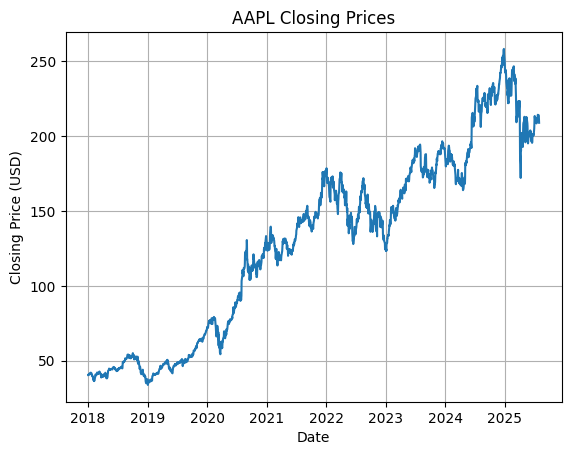

In [ ]:
import matplotlib.pyplot as plt

plt.plot(close_df)
plt.title('AAPL Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()

## 2.3 The ARIMA model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Spliting data intro training and testing
train_size = int(len(close_df) * 0.8)
train_data, test_data = close_df[:train_size], close_df[train_size:]

# Save the indexes of test_data
test_data_indexes = test_data.index

# Redefine the indexes of train_data and test_data to integers
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

# Fit the ARIMA model
model = ARIMA(train_data, order=(4, 1, 1))
model_fit = model.fit()

# Predict over the test data
predictions = model_fit.forecast(steps=len(test_data))

### 2.3.1 Prediction visualization and metrics

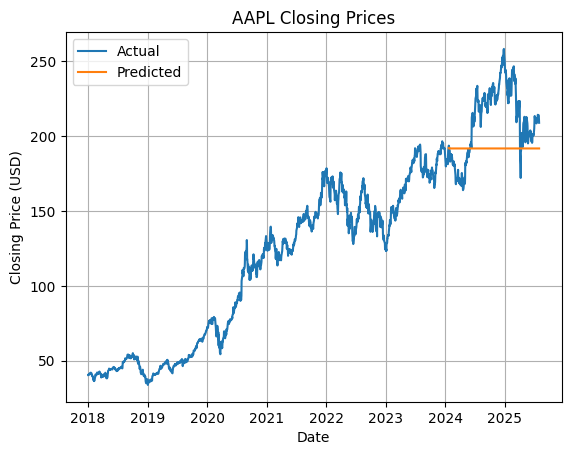

Mean Squared Error (MSE): 876.8630039453366
Mean Absolute Error (MAE): 25.398625912404032


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Copy date index from test_data to predictions
predictions.index = test_data_indexes

# Plot the predicted data along the actual data
plt.plot(close_df, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('AAPL Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print evaluation metrics
mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

### 2.3.2 Model tuning

In [ ]:
import itertools

# Define a range of parameters for (p,d,q)
p = d = q = range(0, 5)

# Generage possible combinations for p, d and q
parameters = list(itertools.product(p, d, q))

# Print some combinations for checking
print(parameters[:10])

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4)]


In [ ]:
# Create a list of MSE for each parameter setting
mse_list = []

# Loop through each parameter setting
for param in parameters:
    # Try to fit the ARIMA model
    try:
        # Notify which set of parameters are being tested
        print(f"Testing parameters: {param}")

        # Fit the ARIMA model
        model = ARIMA(train_data, order=param)
        model_fit = model.fit()

        # Predict the model
        predictions = model_fit.forecast(steps=len(test_data))

        # Calculate the MSE and adds to the list
        mse = mean_squared_error(test_data, predictions)
        mse_list.append(mse)
    except Exception as e:
        print(f"Error with parameters {param}: {e}")

Testing parameters: (0, 0, 0)
Testing parameters: (0, 0, 1)
Testing parameters: (0, 0, 2)
Testing parameters: (0, 0, 3)
Testing parameters: (0, 0, 4)
Testing parameters: (0, 1, 0)
Testing parameters: (0, 1, 1)
Testing parameters: (0, 1, 2)
Testing parameters: (0, 1, 3)
Testing parameters: (0, 1, 4)
Testing parameters: (0, 2, 0)
Testing parameters: (0, 2, 1)
Testing parameters: (0, 2, 2)
Testing parameters: (0, 2, 3)
Testing parameters: (0, 2, 4)
Testing parameters: (0, 3, 0)
Testing parameters: (0, 3, 1)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (0, 3, 2)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (0, 3, 3)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (0, 3, 4)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (0, 4, 0)
Testing parameters: (0, 4, 1)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (0, 4, 2)
Testing parameters: (0, 4, 3)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (0, 4, 4)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Testing parameters: (1, 0, 0)
Testing parameters: (1, 0, 1)
Testing parameters: (1, 0, 2)
Testing parameters: (1, 0, 3)
Testing parameters: (1, 0, 4)
Testing parameters: (1, 1, 0)
Testing parameters: (1, 1, 1)
Testing parameters: (1, 1, 2)
Testing parameters: (1, 1, 3)
Testing parameters: (1, 1, 4)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (1, 2, 0)
Testing parameters: (1, 2, 1)
Testing parameters: (1, 2, 2)
Testing parameters: (1, 2, 3)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (1, 2, 4)
Testing parameters: (1, 3, 0)
Testing parameters: (1, 3, 1)
Testing parameters: (1, 3, 2)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (1, 3, 3)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (1, 3, 4)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (1, 4, 0)
Testing parameters: (1, 4, 1)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (1, 4, 2)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (1, 4, 3)
Testing parameters: (1, 4, 4)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (2, 0, 0)
Testing parameters: (2, 0, 1)
Testing parameters: (2, 0, 2)
Testing parameters: (2, 0, 3)
Testing parameters: (2, 0, 4)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (2, 1, 0)
Testing parameters: (2, 1, 1)
Testing parameters: (2, 1, 2)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (2, 1, 3)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels

Testing parameters: (2, 1, 4)
Testing parameters: (2, 2, 0)
Testing parameters: (2, 2, 1)
Testing parameters: (2, 2, 2)
Testing parameters: (2, 2, 3)
Testing parameters: (2, 2, 4)
Testing parameters: (2, 3, 0)
Testing parameters: (2, 3, 1)
Testing parameters: (2, 3, 2)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (2, 3, 3)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (2, 3, 4)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Testing parameters: (2, 4, 0)
Testing parameters: (2, 4, 1)
Testing parameters: (2, 4, 2)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (2, 4, 3)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (2, 4, 4)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Testing parameters: (3, 0, 0)
Testing parameters: (3, 0, 1)
Testing parameters: (3, 0, 2)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels

Testing parameters: (3, 0, 3)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (3, 0, 4)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Testing parameters: (3, 1, 0)
Testing parameters: (3, 1, 1)
Testing parameters: (3, 1, 2)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels

Testing parameters: (3, 1, 3)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (3, 1, 4)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Testing parameters: (3, 2, 0)
Testing parameters: (3, 2, 1)
Testing parameters: (3, 2, 2)
Testing parameters: (3, 2, 3)
Testing parameters: (3, 2, 4)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Testing parameters: (3, 3, 0)
Testing parameters: (3, 3, 1)
Testing parameters: (3, 3, 2)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (3, 3, 3)
Testing parameters: (3, 3, 4)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (3, 4, 0)
Testing parameters: (3, 4, 1)
Testing parameters: (3, 4, 2)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (3, 4, 3)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (3, 4, 4)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Testing parameters: (4, 0, 0)
Testing parameters: (4, 0, 1)
Testing parameters: (4, 0, 2)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Testing parameters: (4, 0, 3)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels

Testing parameters: (4, 0, 4)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Testing parameters: (4, 1, 0)
Testing parameters: (4, 1, 1)
Testing parameters: (4, 1, 2)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels

Testing parameters: (4, 1, 3)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (4, 1, 4)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Testing parameters: (4, 2, 0)
Testing parameters: (4, 2, 1)
Testing parameters: (4, 2, 2)
Testing parameters: (4, 2, 3)
Testing parameters: (4, 2, 4)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Testing parameters: (4, 3, 0)
Testing parameters: (4, 3, 1)
Testing parameters: (4, 3, 2)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (4, 3, 3)
Testing parameters: (4, 3, 4)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Testing parameters: (4, 4, 0)
Testing parameters: (4, 4, 1)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (4, 4, 2)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (4, 4, 3)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing parameters: (4, 4, 4)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimal parameters: (0, 3, 4)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


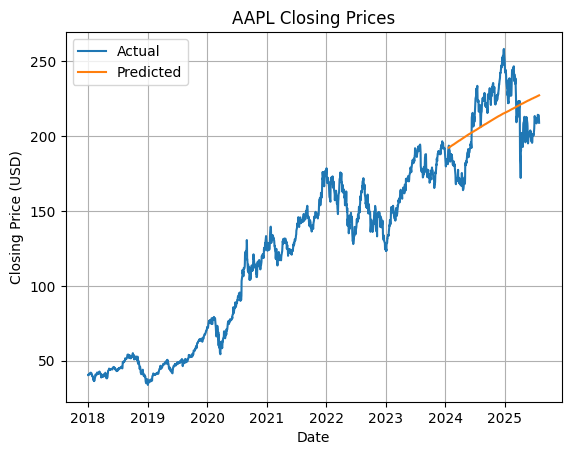

Mean Squared Error (MSE): 398.45419436626713
Mean Absolute Error (MAE): 17.91802997277999


In [ ]:
# Obtain the index of the minimum of mse_list
optimal_index = mse_list.index(min(mse_list))

# Obtain and print the optimal set of parameters (which minimizes the MSE)
optimal_parameters = parameters[optimal_index]
print(f"Optimal parameters: {optimal_parameters}")

# Fit the ARIMA model for the optimal parameters
model = ARIMA(train_data, order=optimal_parameters)
model_fit = model.fit()

# Predict over the test data
predictions = model_fit.forecast(steps=len(test_data))

# Copy date index from text_data to predictions
predictions.index = test_data_indexes

# Plot the predicted data along the actual data
plt.plot(close_df, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('AAPL Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print evaluation metrics
mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

# 3 Conclusion

In this project, we implemented an ARIMA model to predict the closing prices of Apple Inc. (AAPL) stock using historical data. We chose to work with the unadjusted closing price because the adjusted closing price was not available in the dataset we obtained. The adjusted price would have been more suitable since it accounts for corporate actions such as stock splits and dividends, providing a more accurate representation of the actual investment return.

Initially, we tested the ARIMA model with parameters `(4,1,1)`, selected without a specific criterion. This configuration resulted in a poor fit, as evidenced by high MSE and MAE values, along with a noticeable discrepancy between predictions and actual values in the plotted results.

To improve the model’s performance, we performed a grid search to find the optimal `(p, d, q)` parameters. However, due to computational constraints, we limited the search to a maximum value of 4 for each parameter. Despite this limitation, we found a more efficient combination: `(0,3,4)`. With this configuration, the model showed significantly better results. Although the forecast curve does not perfectly match the real data, the model successfully captured the upward trend in stock prices during the prediction period, demonstrating its usefulness for mid-term analysis.

# 4 Next steps

While the current ARIMA implementation provided reasonable results, several improvements could enhance the model's predictive power.

Future work should focus on implementing more sophisticated parameter optimization techniques such as Bayesian optimization to potentially discover better `(p,d,q)` combinations beyond what our grid search could identify.

We could also test the model on longer-term predictions, keeping in mind that the further we try to predict, the less reliable the results might be. It would also be interesting to include external factors or try other models like LSTM or Prophet to compare with ARIMA.

Computational limitations remain a challenge, suggesting the potential value of exploring cloud-based solutions or parallel processing to enable more exhaustive parameter searches.